<a href="https://colab.research.google.com/github/chandanaMellachervu/chandanaMellachervu.github.io/blob/main/Predicting%20Employee%20Attrition%20with%20Deep%20Learning%20and%20Ensemble%20Techniques%3A%20A%20Comprehensive%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings

filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


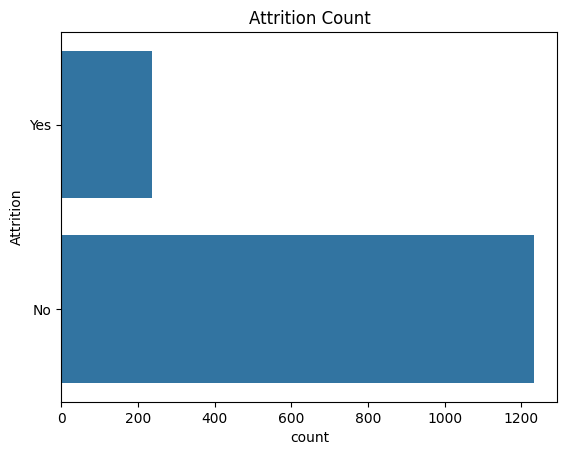

In [ ]:
# Visualize the target variable (Attrition)
sns.countplot(data['Attrition'])
plt.title('Attrition Count')
plt.show()


In [ ]:
import plotly.express as px

# Create histogram with a new color sequence
fig = px.histogram(data, x='Age', color_discrete_sequence=['#ffa07a'])  # Using 'data' instead of 'df'

# Calculate the mean of the Age column
mean_age = data['Age'].mean()

# Add annotation with a different style
fig.add_annotation(x=mean_age, y=0, text=f"Mean: {mean_age:.2f}", showarrow=True, arrowhead=2,  # Changed arrowhead style
                   ax=0, ay=-40, bordercolor="darkblue", borderwidth=2, borderpad=4,  # Changed border color
                   bgcolor="#f0f8ff", opacity=0.85)  # Changed background color

# Update the layout of the figure
fig.update_layout(title='Age Distribution', title_font_color='darkblue', title_font_size=20)  # Title color and size

# Show the figure
fig.show()


In [ ]:
import plotly.express as px

# Create histogram with a new color palette
fig = px.histogram(data, x='Age', color='Attrition', marginal='box',
                   color_discrete_sequence=['#FF6347', '#4682B4'])  # Tomato Red and Steel Blue

# Update layout for enhanced appearance
fig.update_layout(
    title='Age Distribution by Attrition',
    title_font_color='darkblue',  # Dark blue title
    title_font_size=22,  # Larger title font size
    xaxis_title='Age',  # X-axis label
    yaxis_title='Count',  # Y-axis label
    paper_bgcolor='#f7f7f7',  # Light background
    plot_bgcolor='#f0f0f0'  # Light grey plot background
)

# Show the figure
fig.show()


In [ ]:
# Create a histogram with an improved color palette
fig = px.histogram(data, x='DailyRate', color_discrete_sequence=['#FFA07A'])  # Light Salmon color

# Calculate the mean of 'DailyRate'
mean_rate = data['DailyRate'].mean()

# Add an annotation to show the mean
fig.add_annotation(
    x=mean_rate,
    y=0,
    text=f"Mean: {mean_rate:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="#FFFAF0",  # Floral White background for annotation
    opacity=0.9
)

# Update the layout with improved aesthetics
fig.update_layout(
    title='Daily Rate Distribution',
    title_font_color='darkblue',  # Dark blue title font
    title_font_size=22,  # Larger title font
    xaxis_title='Daily Rate',  # X-axis label
    yaxis_title='Count',  # Y-axis label
    paper_bgcolor='#f5f5f5',  # Very light grey background
    plot_bgcolor='#e8e8e8'  # Slightly darker grey for plot background
)

# Show the figure
fig.show()

In [ ]:
import plotly.express as px

# Create a histogram with an improved color palette
fig = px.histogram(data, x='MonthlyRate', color_discrete_sequence=['#FFB6C1'])  # Light Pink color

# Calculate the mean of 'MonthlyRate'
mean_rate = data['MonthlyRate'].mean()

# Add an annotation to show the mean
fig.add_annotation(
    x=mean_rate,
    y=0,
    text=f"Mean: {mean_rate:.2f}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bordercolor="black",
    borderwidth=2,
    borderpad=4,
    bgcolor="#FFFAF0",  # Floral White background for annotation
    opacity=0.9
)

# Update the layout with improved aesthetics
fig.update_layout(
    title='Monthly Rate Distribution',
    title_font_color='darkblue',  # Dark blue title font
    title_font_size=22,  # Larger title font
    xaxis_title='Monthly Rate',  # X-axis label
    yaxis_title='Count',  # Y-axis label
    paper_bgcolor='#f5f5f5',  # Very light grey background
    plot_bgcolor='#e8e8e8'  # Slightly darker grey for plot background
)

# Show the figure
fig.show()


In [ ]:
fig = px.scatter(
    data,
    x='Age',
    y='MonthlyIncome',
    title='Age vs. Monthly Income',
    labels={'Age': 'Age', 'MonthlyIncome': 'Monthly Income'},
    color_discrete_sequence=['#137AA8'],
)
fig.show()

In [ ]:
import math
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of numerical columns to analyze
num_cols = ['HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
            'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Define improved color palette for Attrition
colors = {'Yes': '#FF6347',  # Tomato color for "Yes"
          'No': '#4682B4'}   # Steel blue color for "No"}

n_cols = 2  # Number of columns in the subplot
n_rows = math.ceil(len(num_cols) / n_cols)  # Calculate the number of rows

# Create subplots with improved title layout
fig = make_subplots(
    rows=n_rows,
    cols=n_cols,
    subplot_titles=[f'Distribution of {col}' for col in num_cols],
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

# Iterate over columns and add histograms for each
for i, col in enumerate(num_cols):
    filtered_data_no = data[data['Attrition'] == 'No']
    filtered_data_yes = data[data['Attrition'] == 'Yes']

    # Histogram for "No" Attrition
    fig.add_trace(
        go.Histogram(
            x=filtered_data_no[col],
            name=f'{col} - No',
            marker_color=colors['No'],
            opacity=0.75
        ),
        row=(i // n_cols) + 1, col=(i % n_cols) + 1
    )

    # Histogram for "Yes" Attrition
    fig.add_trace(
        go.Histogram(
            x=filtered_data_yes[col],
            name=f'{col} - Yes',
            marker_color=colors['Yes'],
            opacity=0.75
        ),
        row=(i // n_cols) + 1, col=(i % n_cols) + 1
    )

# Update layout with custom height, width, and enhanced appearance
fig.update_layout(
    height=1200,  # Increased height for better visualization
    width=1100,
    title_text="Distribution of Numerical Columns by Attrition",
    title_font_size=20,
    title_font_color='darkblue',
    barmode='overlay',  # Overlay the histograms
    showlegend=True,
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ),
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()


In [ ]:
# Count data by Gender and Attrition
count_data = data.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')

# Improved color palette
colors = {'Yes': '#FF7F50',  # Coral color for "Yes"
          'No': '#4682B4'}   # Steel blue for "No"}

# Create the figure
fig = go.Figure()

# Loop through unique attrition values and create bar traces
for attrition in count_data['Attrition'].unique():
    filtered_data = count_data[count_data['Attrition'] == attrition]
    fig.add_trace(
        go.Bar(
            x=filtered_data['Gender'],
            y=filtered_data['Count'],
            name=attrition,
            marker_color=colors[attrition]
        )
    )

# Update the layout for improved visualization
fig.update_layout(
    barmode='group',
    title={
        'text': 'Attrition Counts by Gender',
        'y':0.9,  # Vertical position of the title
        'x':0.5,  # Center the title horizontally
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 22, 'color': 'darkblue'}
    },
    xaxis_title='Gender',
    yaxis_title='Count',
    xaxis=dict(
        tickfont=dict(size=14),
        title_font=dict(size=18)
    ),
    yaxis=dict(
        tickfont=dict(size=14),
        title_font=dict(size=18)
    ),
    legend_title='Attrition',
    legend=dict(
        x=0.5,
        y=-0.15,
        orientation="h",
        xanchor="center",
        font=dict(size=14)
    ),
    margin=dict(l=40, r=40, t=80, b=80),
    plot_bgcolor='rgba(0,0,0,0)'  # Set plot background to transparent
)

fig.show()


In [ ]:
# Group data by Department and Attrition, and calculate counts
count_data = data.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

# Updated color palette for better distinction
colors = {'Yes': '#FF6347',  # Tomato color for "Yes"
          'No': '#1E90FF'}   # Dodger blue for "No"}

# Create a bar chart using Plotly Express
fig = px.bar(
    count_data,
    x='Department',
    y='Count',
    color='Attrition',
    color_discrete_map=colors,  # Map colors to 'Yes' and 'No'
    title='Employee Counts by Department and Attrition',
    labels={'Count': 'Number of Employees', 'Attrition': 'Attrition Status'}
)

# Update the layout for improved aesthetics
fig.update_layout(
    xaxis_title='Department',
    yaxis_title='Number of Employees',
    legend_title='Attrition Status',
    barmode='stack',  # Stack bars on top of each other for comparison
    title={
        'x': 0.5,  # Center the title horizontally
        'y': 0.9,  # Vertical position of the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 22, 'color': 'darkblue'}
    },
    legend=dict(
        x=0.5,
        y=-0.15,
        orientation="h",  # Place the legend below the chart
        xanchor="center",
        font=dict(size=14)
    ),
    margin=dict(l=40, r=40, t=80, b=80),
    plot_bgcolor='rgba(0,0,0,0)'  # Transparent background for a clean look
)

# Show the figure
fig.show()


In [ ]:
import numpy as np

# Columns for the radar plot
columns = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
           'RelationshipSatisfaction', 'WorkLifeBalance']

# Melt the data to long format for radar plot
radar_data = pd.melt(data, id_vars=['Attrition'], value_vars=columns,
                     var_name='Metric', value_name='Score')

# Updated color palette for better visual distinction
colors = {'Yes': '#FF5733',  # Vibrant orange-red for "Yes"
          'No': '#3498DB'}   # Bright blue for "No"}

# Initialize radar plot figure
fig = go.Figure()

# Function to add slight jitter to reduce overlap
def add_jitter(scores, jitter_amount=0.05):
    return scores + np.random.uniform(-jitter_amount, jitter_amount, len(scores))

# Create radar plot traces for each attrition group
for attrition in radar_data['Attrition'].unique():
    subset = radar_data[radar_data['Attrition'] == attrition]
    metrics = subset['Metric'].unique()
    scores = [subset[subset['Metric'] == metric]['Score'].values[0] for metric in metrics]

    # Apply jitter to the scores to reduce overlap
    jittered_scores = add_jitter(np.array(scores))

    # Add trace to radar plot
    fig.add_trace(go.Scatterpolar(
        r=jittered_scores.tolist() + [jittered_scores[0]],  # Close the loop
        theta=metrics.tolist() + [metrics[0]],  # Close the loop
        fill='toself',
        name=attrition,
        line=dict(color=colors[attrition], width=3),
        opacity=0.75
    ))

# Update layout of the radar plot
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[1, 4],
                        tickfont=dict(size=12, color="black")),
        angularaxis=dict(
            tickfont=dict(size=13, color="darkblue")
        )
    ),
    showlegend=True,
    title={
        'text': 'Radar Plot of Satisfaction Metrics by Attrition',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 22, 'color': 'darkblue'}
    },
    legend=dict(
        x=0.85,
        y=1.05,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor="black",
        borderwidth=1
    ),
    plot_bgcolor='rgba(0,0,0,0)'
)

# Show the radar plot
fig.show()


In [ ]:
df_cat = pd.get_dummies(df_cat, columns=['Department'], drop_first=True)

In [ ]:
df = pd.DataFrame(data)


In [ ]:
df1 = df.select_dtypes('object')

In [ ]:
df2 = df.select_dtypes('int64')

In [ ]:
df.isnull().sum()
df = df.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
# to separate categorical and numerical columns
cat = df.select_dtypes(['object']).columns
num = df.select_dtypes(['number']).columns
df_copy = df.copy()

In [ ]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'])

In [ ]:
DF = df.copy()

In [ ]:
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single',2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married',3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

In [ ]:
DF = DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'],axis=1)

In [ ]:
#normalizing
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
DF1 = DF.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=DF.columns)

In [ ]:
X = pd.DataFrame(norm_df.drop(columns='Attrition'))
Y = pd.DataFrame(norm_df.Attrition).values.reshape(-1, 1)

In [ ]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_resample(x_train,y_train)

Random Forest

Accuracy: 0.9830
Precision: 0.9833
Recall: 0.9830


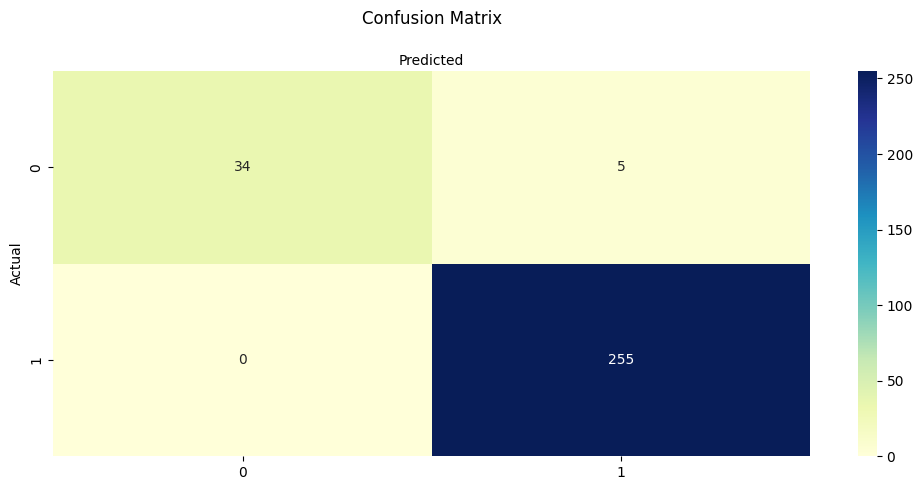


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.99      0.94      0.96       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train, smote_target)

# Predict on the test set
y_pred = rfc.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Random Forest\n')
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for a detailed summary of all metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Decision Tree

Accuracy: 0.9728
Precision: 0.9728
Recall: 0.9728


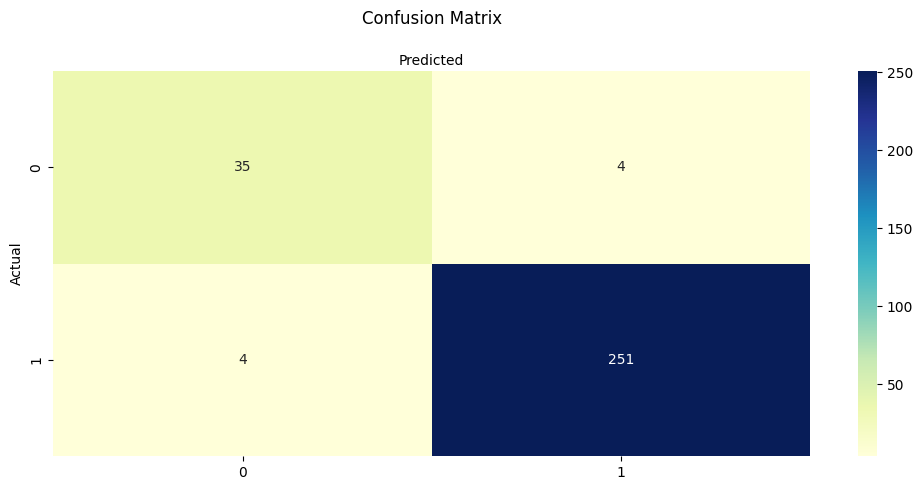


Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        39
         1.0       0.98      0.98      0.98       255

    accuracy                           0.97       294
   macro avg       0.94      0.94      0.94       294
weighted avg       0.97      0.97      0.97       294



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(smote_train, smote_target)

# Predict on the test set
y_pred = dtc.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Decision Tree\n')
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for a detailed summary of all metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Gradient Boosting

Accuracy: 0.9795918367346939
Precision: 0.9794657631392326
Recall: 0.9795918367346939


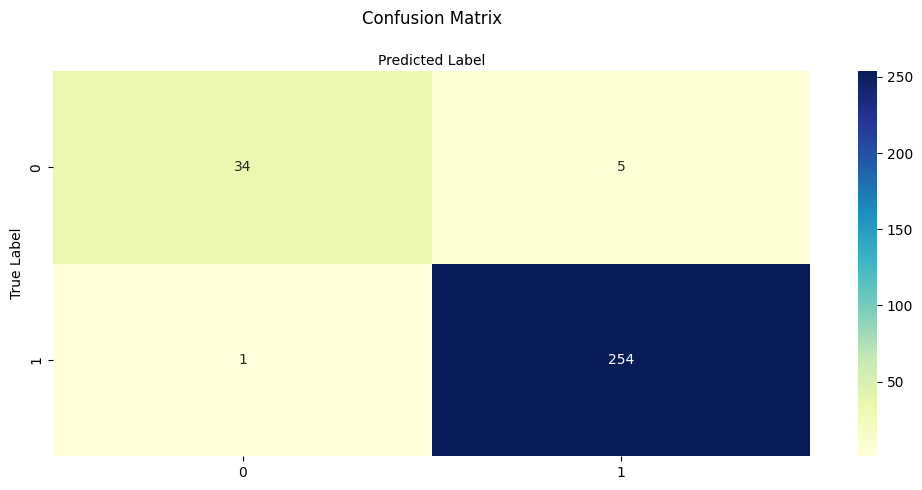

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.98      0.93      0.95       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score

seed = 0
gb_params = {
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate': 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features': 'sqrt',
    'random_state': seed,
    'verbose': 0
}

from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting Classifier
gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train, smote_target)

# Make predictions on the test set
gb_predictions = gb.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, gb_predictions)
print('Gradient Boosting\n')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, gb_predictions)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report with precision and recall
print("Classification Report:\n", classification_report(y_test, gb_predictions))

# Calculate and print precision and recall
precision = precision_score(y_test, gb_predictions, average='weighted')
recall = recall_score(y_test, gb_predictions, average='weighted')




XGBoost Accuracy: 0.9795918367346939
XGBoost Precision: 0.9794657631392326
XGBoost Recall: 0.9795918367346939


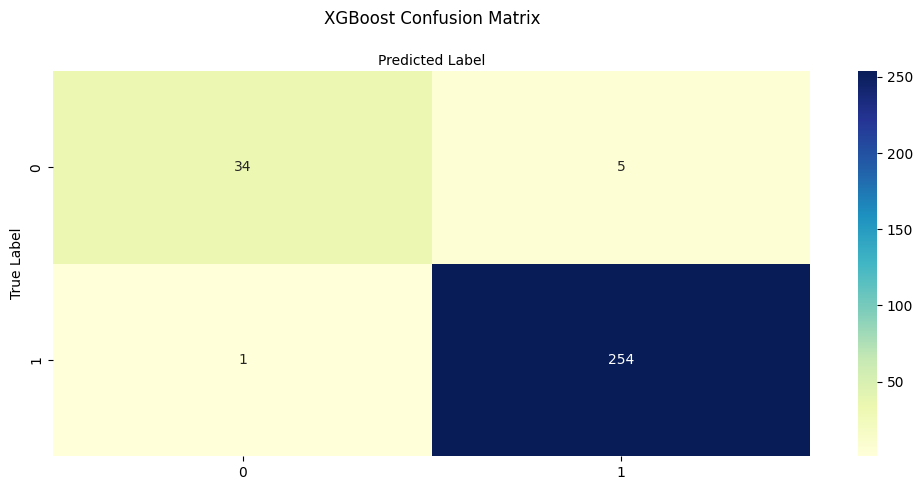

XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        39
         1.0       0.98      1.00      0.99       255

    accuracy                           0.98       294
   macro avg       0.98      0.93      0.95       294
weighted avg       0.98      0.98      0.98       294



In [ ]:
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score

# Set random seed
seed = 0

# Define XGBoost parameters
xgb_params = {
    'n_estimators': 1500,
    'max_depth': 4,
    'learning_rate': 0.25,
    'subsample': 1,
    'colsample_bytree': 0.9,
    'random_state': seed,
    'use_label_encoder': False,  # Avoid warning with newer XGBoost versions
    'verbosity': 0
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(**xgb_params)

# Train the XGBoost model
xgb_clf.fit(smote_train, smote_target)

# Make predictions on the test set
xgb_predictions = xgb_clf.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, xgb_predictions)
print('XGBoost Accuracy:', accuracy)
print('XGBoost Precision:', precision)
print('XGBoost Recall:', recall)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, xgb_predictions)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('XGBoost Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report with precision and recall
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

# Calculate and print precision and recall
precision = precision_score(y_test, xgb_predictions, average='weighted')
recall = recall_score(y_test, xgb_predictions, average='weighted')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00
CatBoost Accuracy: 0.9761904761904762
CatBoost Precision: 0.9758213362864524
CatBoost Recall: 0.9761904761904762


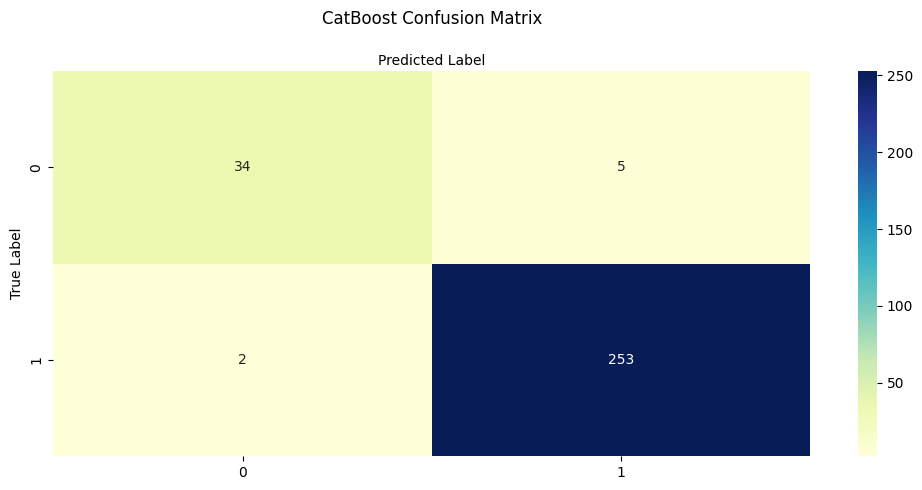

CatBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.91        39
         1.0       0.98      0.99      0.99       255

    accuracy                           0.98       294
   macro avg       0.96      0.93      0.95       294
weighted avg       0.98      0.98      0.98       294



In [ ]:


!pip install catboost
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score

# Set random seed
seed = 0

# Define CatBoost parameters
cat_params = {
    'iterations': 1500,
    'learning_rate': 0.25,
    'depth': 4,
    'random_seed': seed,
    'verbose': 0
}

# Initialize CatBoost classifier
cat_clf = CatBoostClassifier(**cat_params)

# Train the CatBoost model
cat_clf.fit(smote_train, smote_target)

# Make predictions on the test set
cat_predictions = cat_clf.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, cat_predictions)
print('CatBoost Accuracy:', accuracy)
print('CatBoost Precision:', precision)
print('CatBoost Recall:', recall)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, cat_predictions)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('CatBoost Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report with precision and recall
print("CatBoost Classification Report:\n", classification_report(y_test, cat_predictions))

# Calculate and print precision and recall
precision = precision_score(y_test, cat_predictions, average='weighted')
recall = recall_score(y_test, cat_predictions, average='weighted')



AdaBoost Accuracy: 0.891156462585034
AdaBoost Precision: 0.8826924858008947
AdaBoost Recall: 0.891156462585034


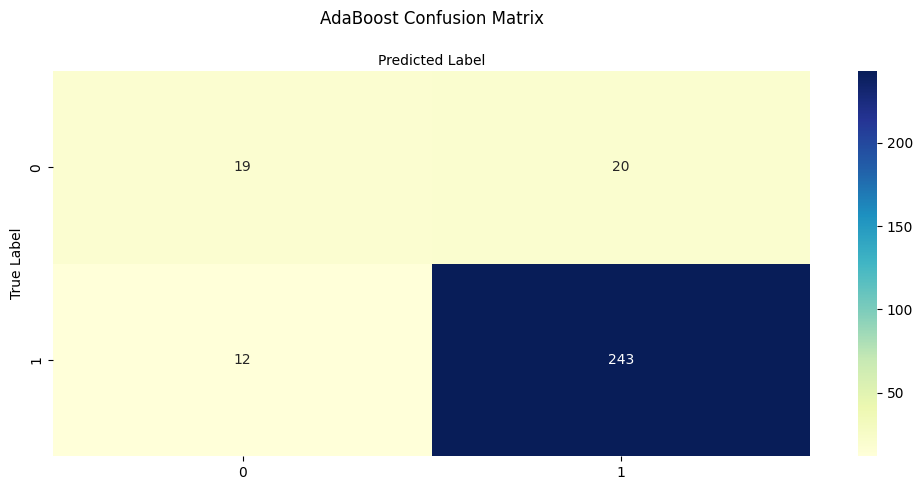

AdaBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.49      0.54        39
         1.0       0.92      0.95      0.94       255

    accuracy                           0.89       294
   macro avg       0.77      0.72      0.74       294
weighted avg       0.88      0.89      0.89       294



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score

# Set random seed
seed = 0

# Define AdaBoost parameters
ada_params = {
    'n_estimators': 1500,
    'learning_rate': 0.25,
    'random_state': seed
}

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(**ada_params)

# Train the AdaBoost model
ada_clf.fit(smote_train, smote_target)

# Make predictions on the test set
ada_predictions = ada_clf.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, ada_predictions)
print('AdaBoost Accuracy:', accuracy)
print('AdaBoost Precision:', precision)
print('AdaBoost Recall:', recall)
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, ada_predictions)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('AdaBoost Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report with precision and recall
print("AdaBoost Classification Report:\n", classification_report(y_test, ada_predictions))

# Calculate and print precision and recall
precision = precision_score(y_test, ada_predictions, average='weighted')
recall = recall_score(y_test, ada_predictions, average='weighted')




Stacking Classifier Accuracy: 0.9693877551020408


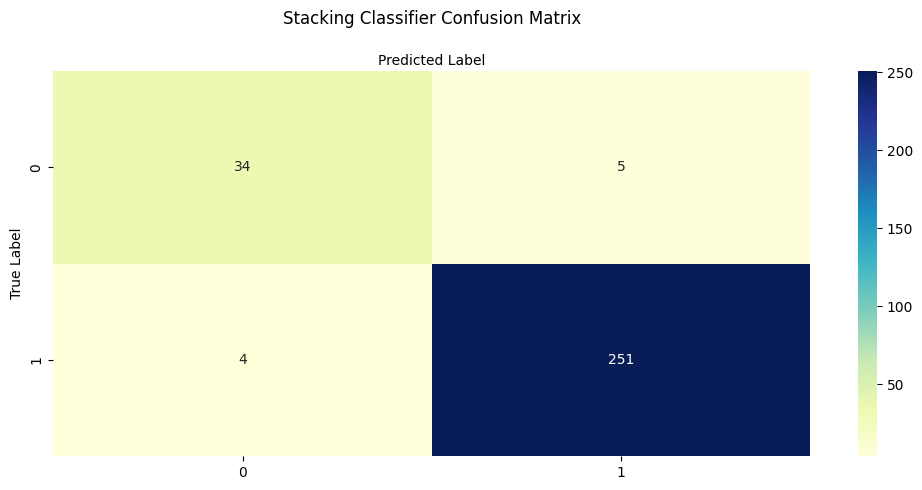

Stacking Classifier Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        39
         1.0       0.98      0.98      0.98       255

    accuracy                           0.97       294
   macro avg       0.94      0.93      0.93       294
weighted avg       0.97      0.97      0.97       294

Stacking Classifier Precision: 0.9690961499731472
Stacking Classifier Recall: 0.9693877551020408


In [ ]:
from sklearn.ensemble import StackingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score

# Set random seed
seed = 0

# Define the base classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=seed)
dt_clf = DecisionTreeClassifier(random_state=seed)
cat_clf = CatBoostClassifier(iterations=1500, learning_rate=0.25, depth=4, random_seed=seed, verbose=0)
ada_clf = AdaBoostClassifier(n_estimators=1500, learning_rate=0.25, random_state=seed)
lgb_clf = lgb.LGBMClassifier(n_estimators=1500, learning_rate=0.25, max_depth=4, random_state=seed)

# Define the meta-classifier (here Logistic Regression)
meta_clf = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[

        ('dt', dt_clf),
        ('cat', cat_clf),
        ('ada', ada_clf),

    ],
    final_estimator=meta_clf,
    passthrough=False,  # set to True if you want to include original features in meta-model
    cv=5
)

# Train the stacking classifier
stacking_clf.fit(smote_train, smote_target)

# Make predictions on the test set
stacking_predictions = stacking_clf.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, stacking_predictions)
print('Stacking Classifier Accuracy:', accuracy)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, stacking_predictions)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Stacking Classifier Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report with precision and recall
print("Stacking Classifier Classification Report:\n", classification_report(y_test, stacking_predictions))

# Calculate and print precision and recall
precision = precision_score(y_test, stacking_predictions, average='weighted')
recall = recall_score(y_test, stacking_predictions, average='weighted')

print('Stacking Classifier Precision:', precision)
print('Stacking Classifier Recall:', recall)


Voting Classifier Accuracy: 0.95
Confusion Matrix:
 [[ 33   6]
 [  8 247]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.85      0.82        39
         1.0       0.98      0.97      0.97       255

    accuracy                           0.95       294
   macro avg       0.89      0.91      0.90       294
weighted avg       0.95      0.95      0.95       294



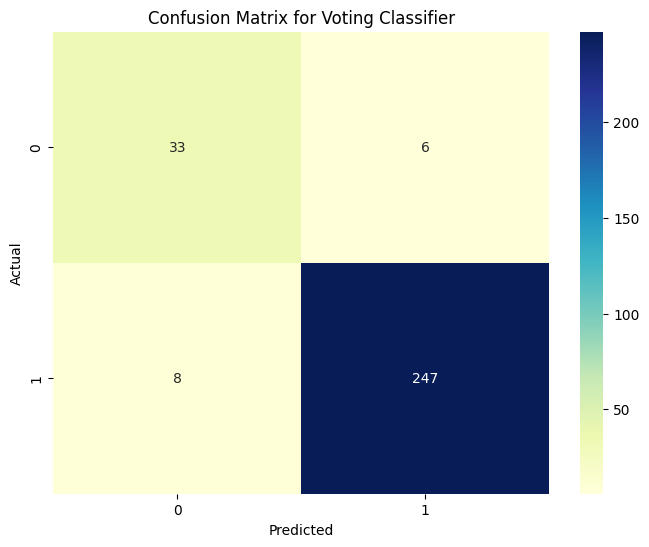

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create instances of the base classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(solver='liblinear', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(probability=True, random_state=42)  # Set probability=True for soft voting

# Create the soft voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('logistic_regression', lr_clf),
        ('knn', knn_clf),
        ('svm', svm_clf)
    ],
    voting='soft'
)

# Fit the voting classifier
voting_clf.fit(smote_train, smote_target)

# Make predictions
voting_predictions = voting_clf.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, voting_predictions)
print(f'Voting Classifier Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, voting_predictions)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, voting_predictions))

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Voting Classifier (Hard Voting) Accuracy: 0.87
Confusion Matrix (Hard Voting):
 [[ 35   4]
 [ 34 221]]
Classification Report (Hard Voting):
               precision    recall  f1-score   support

         0.0       0.51      0.90      0.65        39
         1.0       0.98      0.87      0.92       255

    accuracy                           0.87       294
   macro avg       0.74      0.88      0.78       294
weighted avg       0.92      0.87      0.88       294



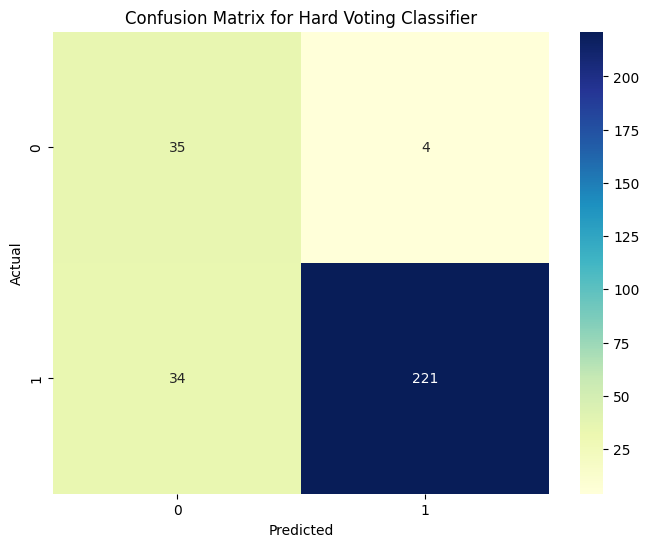

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create instances of the base classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(solver='liblinear', random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(probability=False, random_state=42)  # Set probability=False for hard voting

# Create the hard voting classifier
voting_clf_hard = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('logistic_regression', lr_clf),
        ('knn', knn_clf),
        ('svm', svm_clf)
    ],
    voting='hard'
)

# Fit the voting classifier
voting_clf_hard.fit(smote_train, smote_target)

# Make predictions
voting_predictions_hard = voting_clf_hard.predict(x_test)

# Evaluate performance
accuracy_hard = accuracy_score(y_test, voting_predictions_hard)
print(f'Voting Classifier (Hard Voting) Accuracy: {accuracy_hard:.2f}')

# Confusion Matrix
cm_hard = confusion_matrix(y_test, voting_predictions_hard)
print("Confusion Matrix (Hard Voting):\n", cm_hard)

# Classification Report
print("Classification Report (Hard Voting):\n", classification_report(y_test, voting_predictions_hard))

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hard, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix for Hard Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


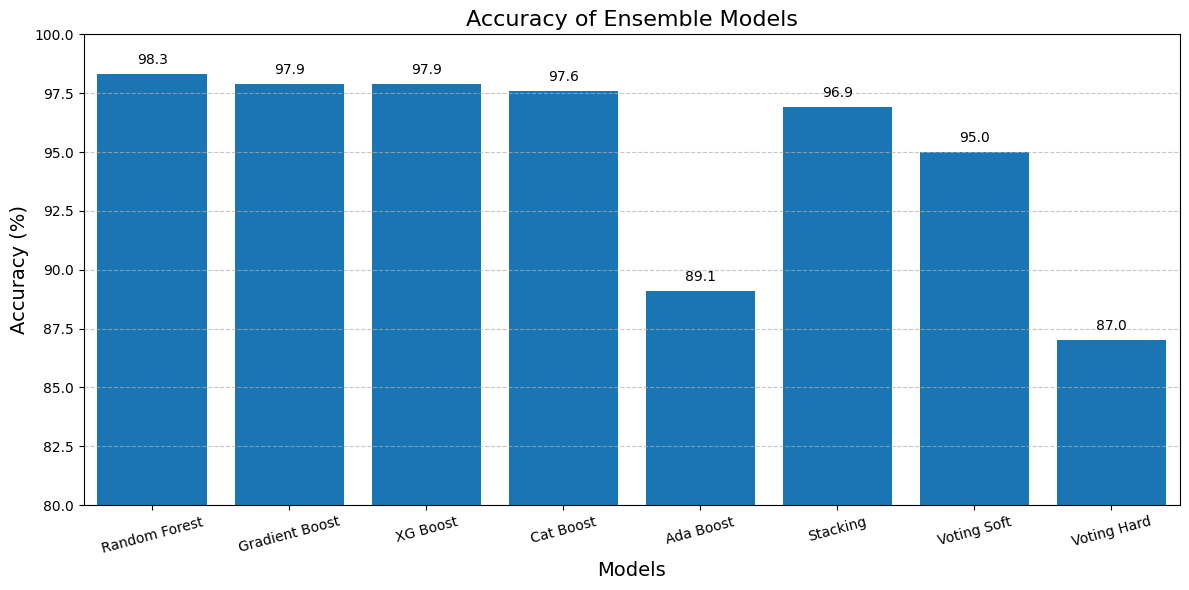

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ['Random Forest', 'Gradient Boost', 'XG Boost', 'Cat Boost', 'Ada Boost', 'Stacking', 'Voting Soft', 'Voting Hard']
accuracies = [98.3, 97.9, 97.9, 97.6, 89.1, 96.9, 95.0, 87.0]

# Create a bar plot with a single color
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=models, y=accuracies, color='#007ACC')  # Using a single color (blue)

# Add accuracy on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=10, color='black',
                     xytext=(0, 5),
                     textcoords='offset points')

# Customizing the plot
plt.title('Accuracy of Ensemble Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(rotation=15)  # Rotate x labels for better readability
plt.ylim(80, 100)  # Set y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Accuracy: 0.8912
Precision: 0.8776
Recall: 0.8912


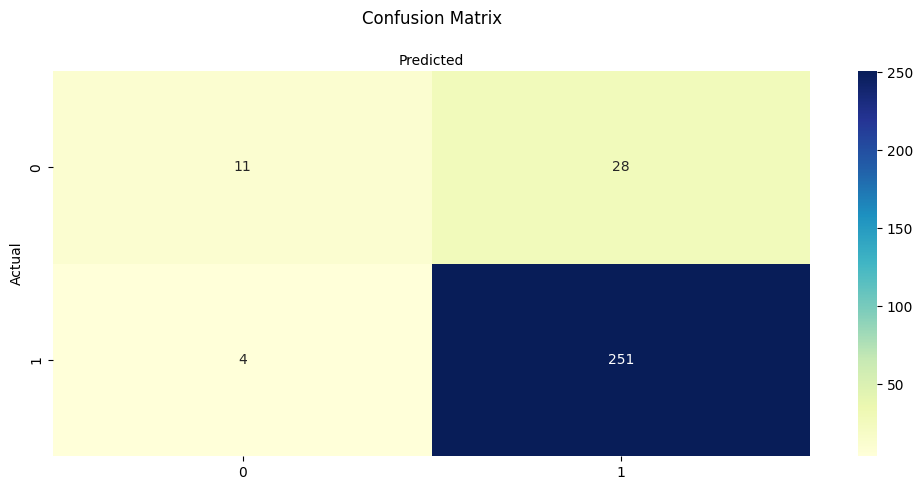


Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.28      0.41        39
         1.0       0.90      0.98      0.94       255

    accuracy                           0.89       294
   macro avg       0.82      0.63      0.67       294
weighted avg       0.88      0.89      0.87       294



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)


# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# Print accuracy, confusion matrix, and classification report
print(f'Accuracy: {accuracy:.4f}')
# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')



# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Classification report for a detailed summary of all metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.8775510204081632
Precision: 0.8684
Recall: 0.8776


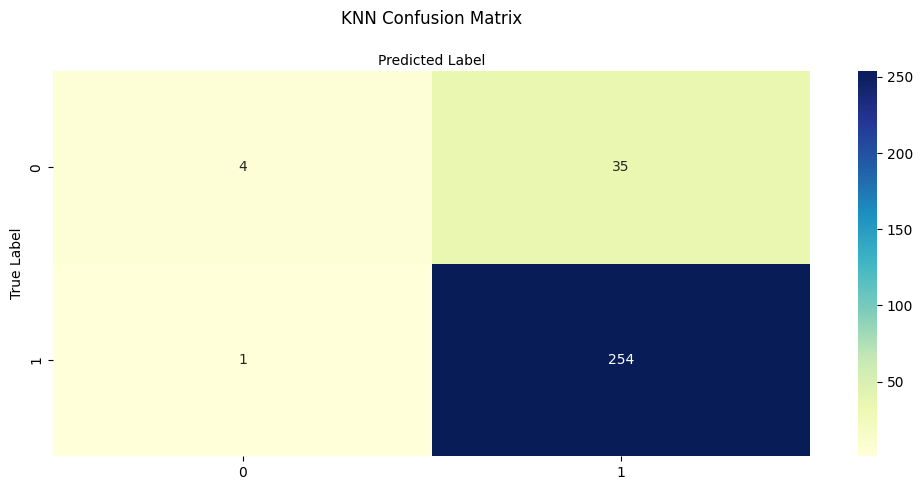

KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.10      0.18        39
         1.0       0.88      1.00      0.93       255

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score



# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=20)  # You can adjust n_neighbors as needed

# Train the KNN model
knn.fit(x_train, y_train)

# Predict on the test set
y_pred = knn.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('KNN Accuracy:', accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('KNN Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report for a detailed summary of all metrics
print("KNN Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8878
Precision: 0.9006
Recall: 0.8878


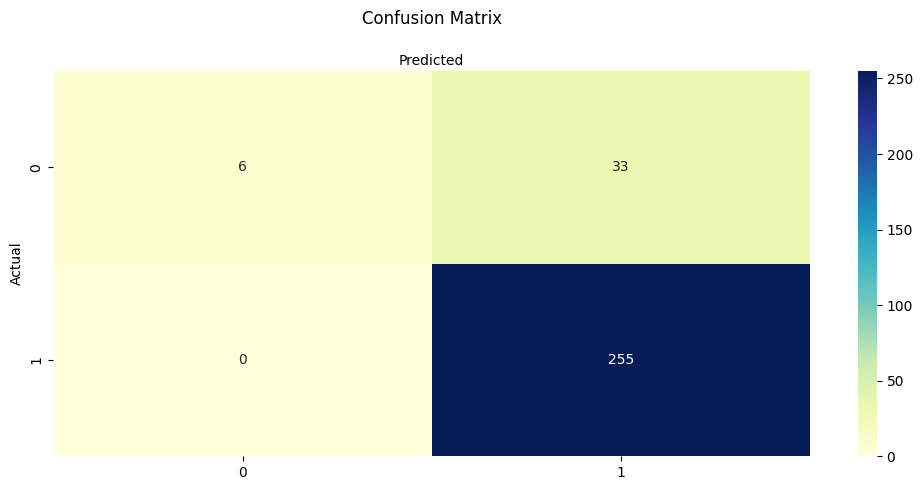


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.15      0.27        39
         1.0       0.89      1.00      0.94       255

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Split the data (make sure to define X and Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Support Vector Machine model
svm = SVC()  # Initialize the SVM classifier
svm.fit(x_train, y_train)  # Fit the model to the training data

# Make predictions on the test data
y_pred = svm.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print accuracy, precision, and recall
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report for a detailed summary of all metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.8945578231292517
Precision: 0.8841
Recall: 0.8946


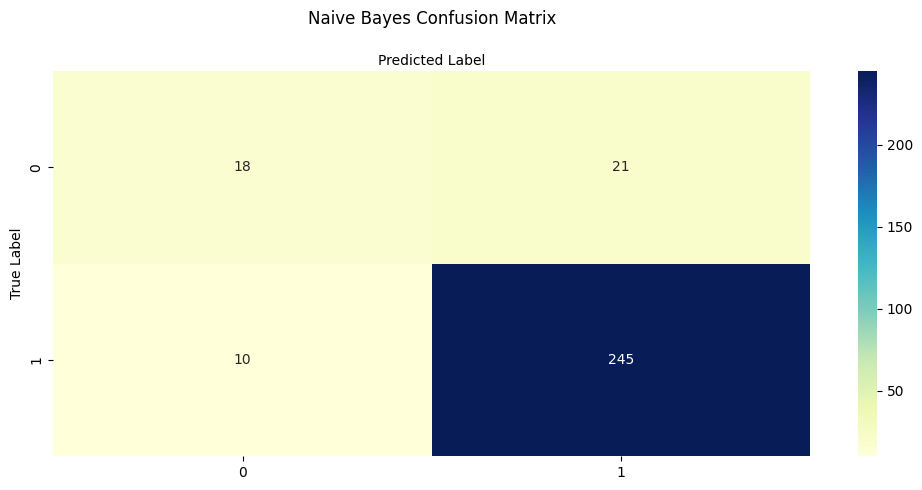

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.64      0.46      0.54        39
         1.0       0.92      0.96      0.94       255

    accuracy                           0.89       294
   macro avg       0.78      0.71      0.74       294
weighted avg       0.88      0.89      0.89       294



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score

# Example data - replace X and Y with your actual features and labels
# X = ...  # Features
# Y = ...  # Labels

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes model
nb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(x_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Naive Bayes Accuracy:', accuracy)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print precision and recall
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 5))
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Naive Bayes Confusion Matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report for a detailed summary of all metrics
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred))


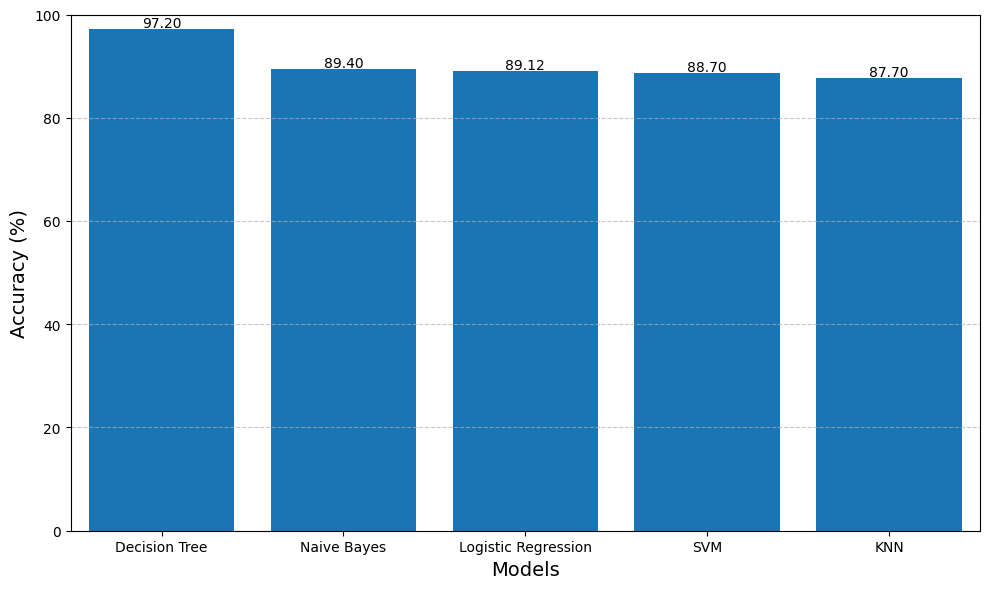

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracies
models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree']
accuracies = [89.12, 87.7, 88.7, 89.4, 97.2]

# Combine the models and accuracies into a list of tuples
combined = list(zip(models, accuracies))

# Sort the combined list by accuracies in descending order
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)

# Unzip the sorted list back into models and accuracies
sorted_models, sorted_accuracies = zip(*sorted_combined)

# Create a bar plot with a single color
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=sorted_models, y=sorted_accuracies, color='#007ACC')  # Using a single color (blue)

# Add accuracy on top of the bars
for p in barplot.patches:
    yval = p.get_height()
    # Adjust the y-offset to move the label slightly above the bar
    plt.text(p.get_x() + p.get_width()/2, yval -0.2, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Make predictions
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return accuracy, precision, recall


In [ ]:
# Define the Feedforward Neural Network
def create_ffn_model(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and evaluate the model
ffn_model = create_ffn_model(x_train.shape[1])
ffn_accuracy, ffn_precision, ffn_recall = train_and_evaluate_model(ffn_model, x_train, x_test, y_train, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
def create_cnn_model(input_shape):
    model = keras.Sequential([
        layers.Reshape((input_shape, 1), input_shape=(input_shape,)),  # Reshape input for CNN
        layers.Conv1D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(16, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and evaluate the model
cnn_model = create_cnn_model(x_train.shape[1])
cnn_accuracy, cnn_precision, cnn_recall = train_and_evaluate_model(cnn_model, x_train, x_test, y_train, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
def create_rnn_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=(input_shape, 1)),  # Reshape input for RNN
        layers.LSTM(50, return_sequences=True),
        layers.LSTM(25),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and evaluate the model
rnn_model = create_rnn_model(x_train.shape[1])
rnn_accuracy, rnn_precision, rnn_recall = train_and_evaluate_model(rnn_model, x_train, x_test, y_train, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [ ]:
def create_ffn_model_with_dropout(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dropout(0.5),  # Dropout layer to prevent overfitting
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # For binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and evaluate the model
ffn_dropout_model = create_ffn_model_with_dropout(x_train.shape[1])
ffn_dropout_accuracy, ffn_dropout_precision, ffn_dropout_recall = train_and_evaluate_model(ffn_dropout_model, x_train, x_test, y_train, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
results = {
    'Model': ['Feedforward Neural Network', 'CNN', 'RNN', 'Feedforward NN with Dropout'],
    'Accuracy': [ffn_accuracy, cnn_accuracy, rnn_accuracy, ffn_dropout_accuracy],
    'Precision': [ffn_precision, cnn_precision, rnn_precision, ffn_dropout_precision],
    'Recall': [ffn_recall, cnn_recall, rnn_recall, ffn_dropout_recall]
}

results_df = pd.DataFrame(results)
print(results_df)


                         Model  Accuracy  Precision    Recall
0   Feedforward Neural Network  0.843537   0.887160  0.930612
1                          CNN  0.884354   0.880866  0.995918
2                          RNN  0.836735   0.845614  0.983673
3  Feedforward NN with Dropout  0.870748   0.887640  0.967347


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Assuming your preprocessed dataset is ready
# x_train, x_test, y_train, y_test should already be defined
# Convert DataFrames to NumPy arrays
x_train_array = x_train.values  # or use x_train.to_numpy()
x_test_array = x_test.values     # or use x_test.to_numpy()

# Reshape data for LSTM: (samples, timesteps, features)
timesteps = 1
num_features = x_train_array.shape[1]  # Number of features in your dataset

# Reshape the arrays
x_train_lstm = x_train_array.reshape((x_train_array.shape[0], timesteps, num_features))
x_test_lstm = x_test_array.reshape((x_test_array.shape[0], timesteps, num_features))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, num_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' if you have more than two classes

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
model.fit(x_train_lstm, y_train, validation_data=(x_test_lstm, y_test),
          epochs=100, batch_size=32, callbacks=[early_stopping], verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test_lstm, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Epoch 1/100
37/37 - 8s - 228ms/step - accuracy: 0.8265 - loss: 0.6050 - val_accuracy: 0.8333 - val_loss: 0.4635
Epoch 2/100
37/37 - 1s - 21ms/step - accuracy: 0.8401 - loss: 0.4230 - val_accuracy: 0.8333 - val_loss: 0.4178
Epoch 3/100
37/37 - 0s - 8ms/step - accuracy: 0.8401 - loss: 0.4099 - val_accuracy: 0.8333 - val_loss: 0.4059
Epoch 4/100
37/37 - 0s - 5ms/step - accuracy: 0.8401 - loss: 0.4062 - val_accuracy: 0.8333 - val_loss: 0.3964
Epoch 5/100
37/37 - 0s - 6ms/step - accuracy: 0.8401 - loss: 0.3924 - val_accuracy: 0.8333 - val_loss: 0.3836
Epoch 6/100
37/37 - 0s - 5ms/step - accuracy: 0.8401 - loss: 0.3790 - val_accuracy: 0.8333 - val_loss: 0.3720
Epoch 7/100
37/37 - 0s - 5ms/step - accuracy: 0.8401 - loss: 0.3716 - val_accuracy: 0.8333 - val_loss: 0.3615
Epoch 8/100
37/37 - 0s - 5ms/step - accuracy: 0.8418 - loss: 0.3685 - val_accuracy: 0.8333 - val_loss: 0.3553
Epoch 9/100
37/37 - 0s - 5ms/step - accuracy: 0.8444 - loss: 0.3571 - val_accuracy: 0.8435 - val_loss: 0.3487
Epoch 1

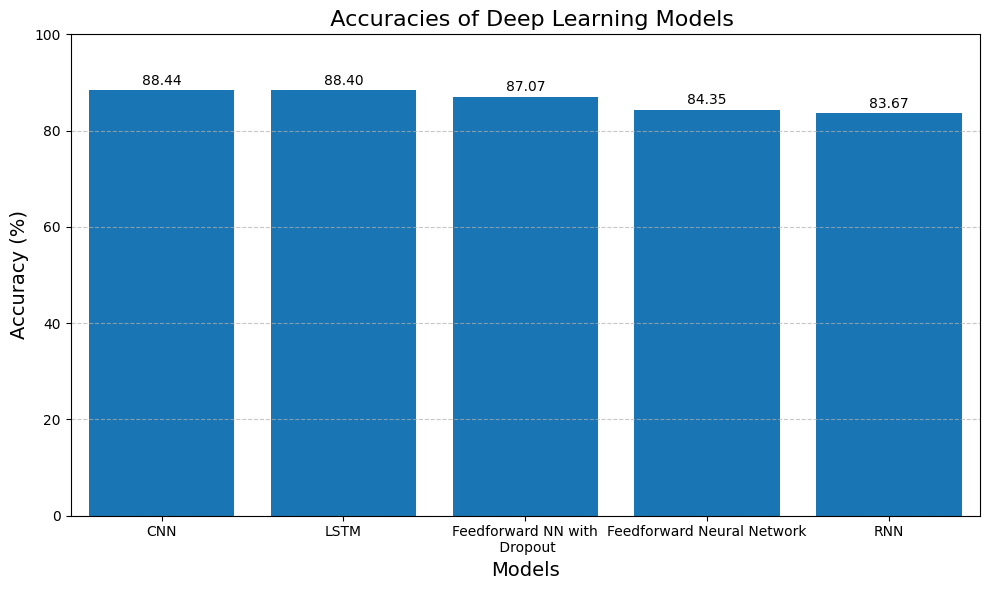

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their corresponding accuracies
models = ['Feedforward Neural Network', 'CNN', 'RNN', 'Feedforward NN with\n Dropout','LSTM']
accuracies = [84.35, 88.44, 83.67, 87.07,88.4]  # Accuracy values in percentage

# Combine the models and accuracies into a list of tuples
combined = list(zip(models, accuracies))

# Sort the combined list by accuracies in descending order
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)

# Unzip the sorted list back into models and accuracies
sorted_models, sorted_accuracies = zip(*sorted_combined)

# Create a bar plot with a single color
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=sorted_models, y=sorted_accuracies, color='#007ACC')  # Using a single color (blue)

# Add accuracy on top of the bars
for p in barplot.patches:
    yval = p.get_height()
    # Adjust the y-offset to move the label slightly above the bar
    plt.text(p.get_x() + p.get_width()/2, yval + 0.5, f'{yval:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

# Add titles and labels
plt.title('  Accuracies of Deep Learning Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


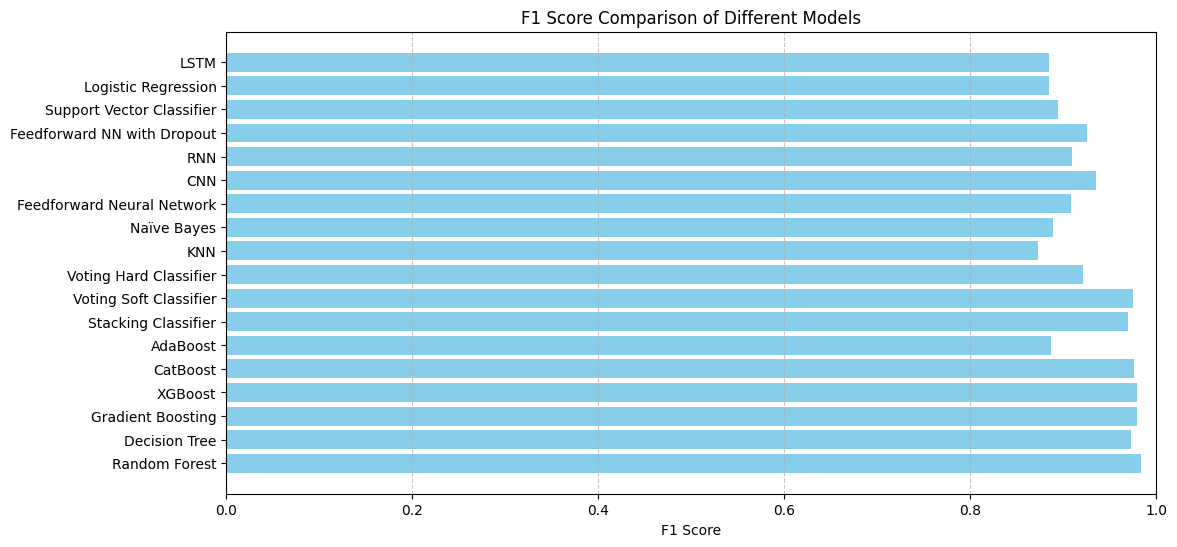

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given precision and recall values for each model
models = [
    "Random Forest",
    "Decision Tree",
    "Gradient Boosting",
    "XGBoost",
    "CatBoost",
    "AdaBoost",
    "Stacking Classifier",
    "Voting Soft Classifier",
    "Voting Hard Classifier",
    "KNN",
    "Naïve Bayes",
    "Feedforward Neural Network",
    "CNN",
    "RNN",
    "Feedforward NN with Dropout",
    "Support Vector Classifier",
    "Logistic Regression",
    "LSTM"
]

precision = [
    0.9833,  # Random Forest
    0.9728,  # Decision Tree
    0.9794,  # Gradient Boosting
    0.9794,  # XGBoost
    0.9758,  # CatBoost
    0.8826,  # AdaBoost
    0.9690,  # Stacking Classifier
    0.9800,  # Voting Soft Classifier
    0.9800,  # Voting Hard Classifier
    0.8684,  # KNN
    0.8841,  # Naïve Bayes
    0.8872,  # Feedforward Neural Network
    0.8809,  # CNN
    0.8456,  # RNN
    0.8876,  # Feedforward NN with Dropout
    0.9006,  # Support Vector Classifier
    0.8776,  # Logistic Regression
    0.8844   # LSTM
]

recall = [
    0.9830,  # Random Forest
    0.9728,  # Decision Tree
    0.9795,  # Gradient Boosting
    0.9795,  # XGBoost
    0.9761,  # CatBoost
    0.8911,  # AdaBoost
    0.9693,  # Stacking Classifier
    0.9700,  # Voting Soft Classifier
    0.8700,  # Voting Hard Classifier
    0.8776,  # KNN
    0.8946,  # Naïve Bayes
    0.9306,  # Feedforward Neural Network
    0.9959,  # CNN
    0.9837,  # RNN
    0.9673,  # Feedforward NN with Dropout
    0.8878,  # Support Vector Classifier
    0.8912,  # Logistic Regression
    0.8844   # LSTM
]

# Calculate F1 Score for each model
f1_scores = [
    2 * (p * r) / (p + r) for p, r in zip(precision, recall)
]

# Visualizing the F1 Scores
plt.figure(figsize=(12, 6))
plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.xlim(0, 1)  # Limit the x-axis to range from 0 to 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


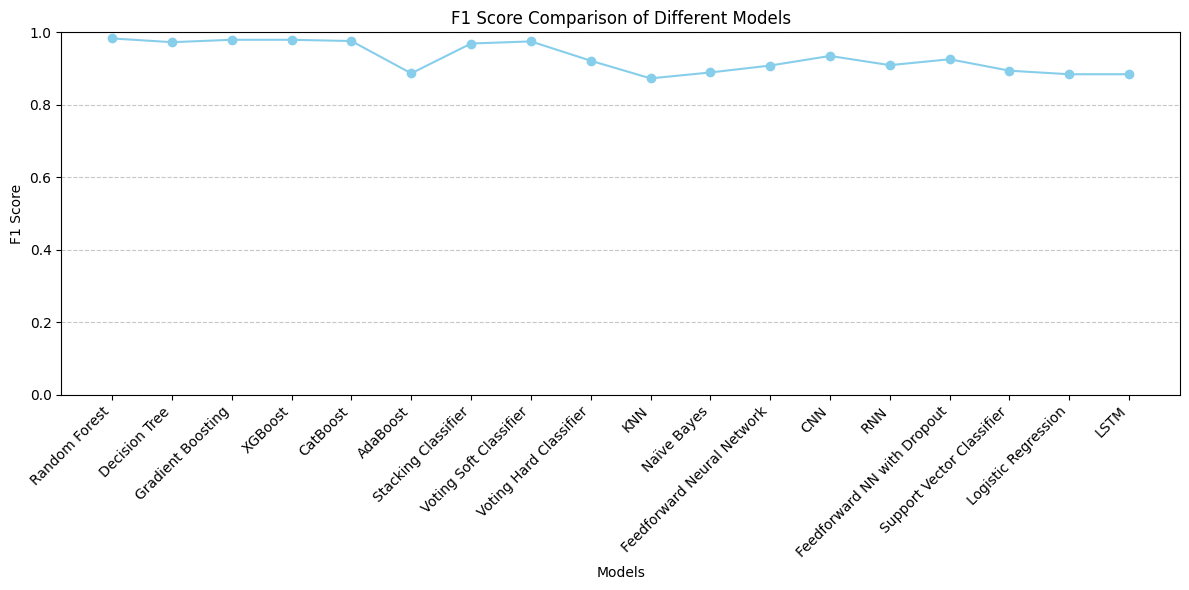

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given precision and recall values for each model
models = [
    "Random Forest",
    "Decision Tree",
    "Gradient Boosting",
    "XGBoost",
    "CatBoost",
    "AdaBoost",
    "Stacking Classifier",
    "Voting Soft Classifier",
    "Voting Hard Classifier",
    "KNN",
    "Naïve Bayes",
    "Feedforward Neural Network",
    "CNN",
    "RNN",
    "Feedforward NN with Dropout",
    "Support Vector Classifier",
    "Logistic Regression",
    "LSTM"
]

precision = [
    0.9833,  # Random Forest
    0.9728,  # Decision Tree
    0.9794,  # Gradient Boosting
    0.9794,  # XGBoost
    0.9758,  # CatBoost
    0.8826,  # AdaBoost
    0.9690,  # Stacking Classifier
    0.9800,  # Voting Soft Classifier
    0.9800,  # Voting Hard Classifier
    0.8684,  # KNN
    0.8841,  # Naïve Bayes
    0.8872,  # Feedforward Neural Network
    0.8809,  # CNN
    0.8456,  # RNN
    0.8876,  # Feedforward NN with Dropout
    0.9006,  # Support Vector Classifier
    0.8776,  # Logistic Regression
    0.8844   # LSTM
]

recall = [
    0.9830,  # Random Forest
    0.9728,  # Decision Tree
    0.9795,  # Gradient Boosting
    0.9795,  # XGBoost
    0.9761,  # CatBoost
    0.8911,  # AdaBoost
    0.9693,  # Stacking Classifier
    0.9700,  # Voting Soft Classifier
    0.8700,  # Voting Hard Classifier
    0.8776,  # KNN
    0.8946,  # Naïve Bayes
    0.9306,  # Feedforward Neural Network
    0.9959,  # CNN
    0.9837,  # RNN
    0.9673,  # Feedforward NN with Dropout
    0.8878,  # Support Vector Classifier
    0.8912,  # Logistic Regression
    0.8844   # LSTM
]

# Calculate F1 Score for each model
f1_scores = [
    2 * (p * r) / (p + r) for p, r in zip(precision, recall)
]

# Visualizing the F1 Scores using a curve
plt.figure(figsize=(12, 6))
plt.plot(models, f1_scores, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Models')
plt.ylim(0, 1)  # Limit the y-axis to range from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate model names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
